### Practical Task 1

#### Python-Jupyter Notebook Project for Simple Linear Regression 📈
* Create a Jupyter Notebook called insurance_regression.ipynb.
* Import insurance.csv into your Notebook (Source <https://www.kaggle.com/datasets/mirichoi0218/insurance>).
* Use the data in the correct columns to determine how age affects insurance costs:
    * Plot a scatter plot with age on the X-axis and charges on the Y-axis.
    * Using linear_model.LinearRegression() from sklearn, fit a model to the data, and make predictions on the data.
    * Plot another scatter plot with the best-fit line.

In [238]:
import numpy as np
import pandas as pd
import sklearn
# Import required libraries for data and analysis to perform EDA

import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries for Graph plotting

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
# Used sklearn specific library to deal with scaling, imputation and linear regression

%matplotlib inline
# Code helpful to save and pan, as using Matplotlib to plot and render interactive plots

In [239]:

df = pd.read_csv('insurance.csv')

df.head(10)
# Import the insurance dataset and check its loaded correctly

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [240]:
df.shape

(1338, 7)

In [241]:
df.isnull().sum()
# Check number of missing values from the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

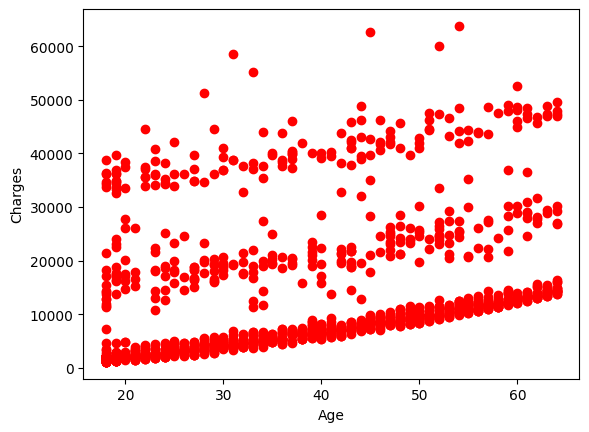

In [242]:
x = df.iloc[:,0].values
y = df.iloc[:,-1].values

plt.scatter(x,y, color='r')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()
# Initial scatter plot (for age vs charges) to view data distribution

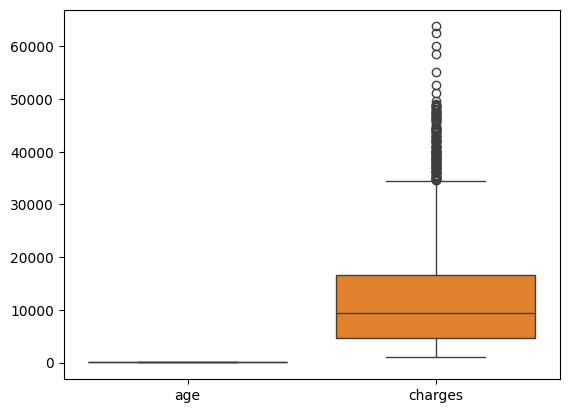

In [243]:
df_box = sns.boxplot(df[['age', 'charges']])
# Box plot (for age and charges) to view outliers and distribution

In [244]:
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)
# Applied reshape() to help fit a model

In [245]:
insurance_model = LinearRegression()
insurance_model.fit(x,y)
# Fit the model

LinearRegression()

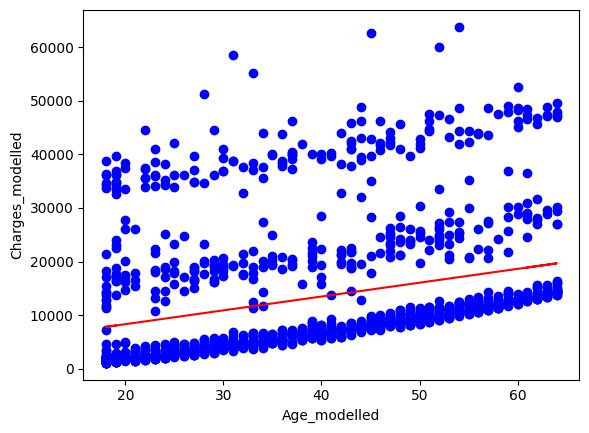

In [246]:
y_pred = insurance_model.predict(x)

plt.scatter(x,y,color = 'b')
plt.plot(x,y_pred,color = 'r')
plt.xlabel('Age_modelled')
plt.ylabel('Charges_modelled')
plt.show()
# Plot the data and the linear regression model

We can use above linear regression model to determine how much charges will someone pay for specified age. In other words, we will extrapolate the linear model to predict a charges for known age data.

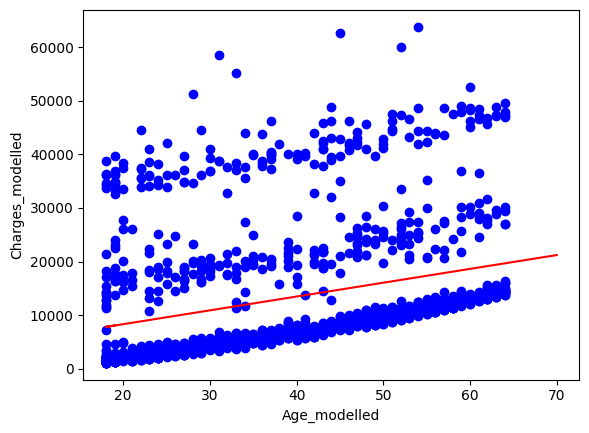

Individual to pay charges on basis of age: [[21206.46831275]]


In [247]:
# Predict a value of charge for a given age (we have assumed x=70)
known_x = [[70]] 

x_pred = np.append(x, known_x).reshape(-1,1)
y_pred = insurance_model.predict(x_pred)

plt.scatter(x,y,color = 'b')
plt.plot(x_pred,y_pred,color = 'r')
plt.xlabel('Age_modelled')
plt.ylabel('Charges_modelled')
plt.show()

print("Individual to pay charges on basis of age:", insurance_model.predict(known_x))